# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
      
---
* [Object Detection1 ](#Object-Detection1 )
    * [Selective Search](#Selective-Search )
    * [Object Detection Dataset ](#Object-Detection Dataset)
    * [R-CNN ](#R-CNN )
    * [SPPNet](#SPPNet)

## Object Detection1 
  - classification+  localization
    - 영역
        - window sliding
        - regional proposals : 물체가 있을 만한 **영역 찾음**
            - 지도학습 regression 4가지 좌표값 예측
     - 영역 내에 무엇이 있는지

#### Selective Search
- 전체 영역에서  **4가지 유사도 색상, 텍스쳐, 사이즈, fill** 기반으로 그것들을 둘러싸는 다양한 크기의 window 찾음
- python seletive-search 참고: https://pypi.org/project/selective-search/
    - mode: `single`, `fast`, `quality` 
    - Similarity m`asure :CTSF (color, texture, size, fill)
    - Starting Regions(k)
    - Number of combination 1,8,80

- **hierachial grouping**algorithm
  - 유사도 높은것끼리 서로 합쳐서 크기 점점 확장해서 물체가 있을만한 영역 잡음

- Capture all scales 
-  diversification
- faster computation

In [ ]:
pip install selective-search

In [2]:
import skimage.io # Numpy 기반
from selective_search import selective_search #설치- ,다운로드_

In [6]:
image = skimage.io.imread('desktop/ever.jpg')

In [7]:
#속도 느림
boxes = selective_search(image, mode='single', random_sort=False) 

In [8]:
boxes[0] #있을 만한 영역의 점 4개

(0, 0, 600, 465)

In [9]:
from PIL import Image

In [11]:
im=Image.open('desktop/ever.jpg')

In [18]:
from PIL import ImageDraw
idraw=ImageDraw.Draw(im)
idraw.rectangle(boxes[1], outline='pink') #0전체 영역

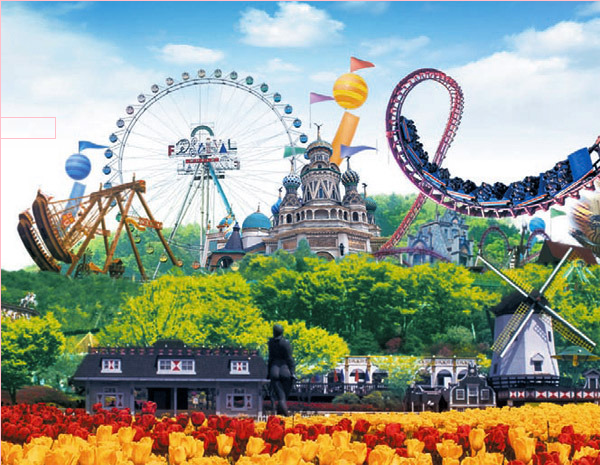

In [19]:
im 

In [24]:
len(boxes)

865

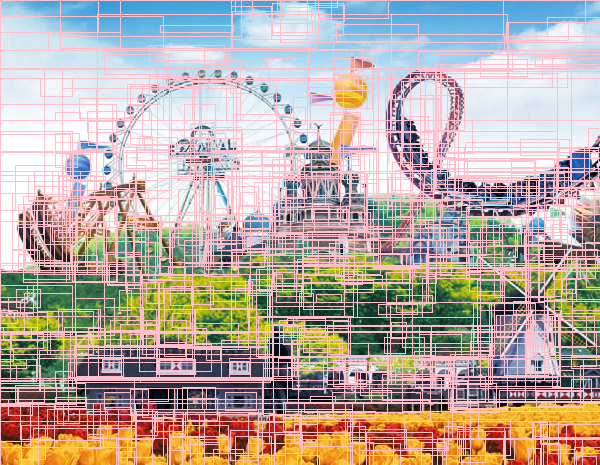

In [25]:
for i in boxes:
    idraw.rectangle(i, outline='pink')
im

In [23]:
#fast 영역 빠르게 찾도록 조절 
boxes = selective_search(image, mode='fast', random_sort=False) #

In [20]:
len(boxes) # 갯수 차이 약 4.5배, 정확도가 떨어짐

3967

In [21]:
im=Image.open('desktop/ever.jpg')
idraw=ImageDraw.Draw(im)

for i in boxes:
    idraw.rectangle(i, outline='pink')

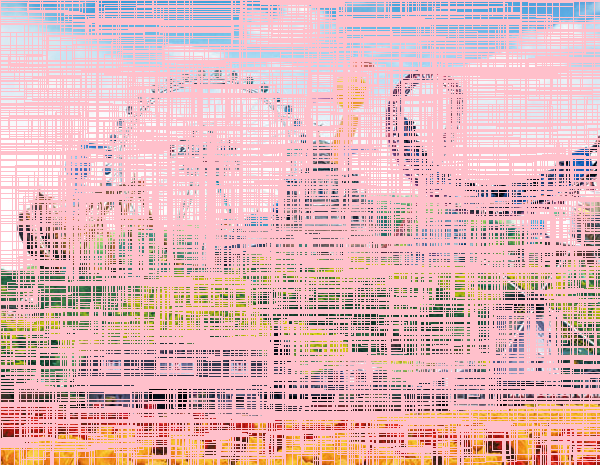

In [22]:
im

In [26]:
boxes = selective_search(image, mode='quality', random_sort=False) 

In [27]:
len(boxes)

17774

In [28]:
im=Image.open('desktop/ever.jpg')
idraw=ImageDraw.Draw(im)

for i in boxes:
    idraw.rectangle(i, outline='pink')

In [30]:
#regression 데이터셋 예시.수치적 특성으로 보스턴 집값 예측
from sklearn.datasets import load_boston #부정적 용어 이름 바꿈

In [31]:
data= load_boston() #BLM.. B(흑인 비율)관련 데이터 사라질 예정
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [32]:
import seaborn as sns
mpg=sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Object Detection Dataset
- pandas DataFrame(platform 종속적), json,csv,xml 으로 구성 

### Pascal VOC Dataset 
더 이상 공개를 하지않아서 mirror 사이트에서 다운로드 
- classification Dataset: 클래스로 이름으로 된 폴더별로 이미지
- localization Dataset:이미지 한장에 좌표값과 클래스

1. Annotation
   - json ,csv ,xml 파일:
      - Image info : width, height, depth, name, pose 
      - 좌표값 4개 xmin,ymin,xmax,ymax  
2. ImageSet
3. JPEGImages


- 참고 : https://pjreddie.com/projects/pascal-voc-dataset-mirror/
  
## R-CNN 
- selective search
    - 이미지 크기 crop,resize (데이터 왜곡)
- Alexnet
    - feature extraction
- SVM
- B-box regressor
 
 
R-CNN 구현 
1. 데이터셋 불러오기
2. CNN +SVM 모델 합치기
  - transfer learning(include_top=False)
  - 모델은 이미 구현되어 있어서 쉬움
  - 입출력 맞춤

In [9]:
# keras 실력!
import tensorflow as tf
vgg = tf.keras.applications.VGG16(include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [11]:
vgg.summary()   

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [15]:
model=tf.keras.models.Sequential([
                                  tf.keras.Input( (224,224,3)),
                                  vgg, 
                                  tf.keras.layers.GlobalAvgPool2D()
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [18]:
from sklearn.svm import SVC #scikit의 svm

In [ ]:
model( image )
model.predict(image)
svm=SVC()
svm.fit() #컨볼루션 지나간 데이터셋을 넣어서 연결

In [19]:
#SPPNEt: spatial pyramid pooling layer
dir(tf.keras.layers) #기본으로 제공해주는 layer 에서는 없음  -> 이미 만들어진 거 기반으로  "상속"  

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv2D',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPool2D',
 'GlobalMaxPool3D',
 'GlobalMaxPooling1D',
 'GlobalMaxPooling2D',
 'Global

---
## SPPNet 
- Spatial pyramid pooling Kaiming He(2014)
#### Spatial pyramid pooling
이미지 크기를 맞추기 위해서 crop/warp 이미지 왜곡해서 **Spatial pyramid pooling(SPP)**
이용 

#### BoW(bag-of-Words)
- 특정 개체 분류시 큰 특징대신 작은 여러개의 특징을 사용하면 개체를 잘 구별

1. BoW 영상 전체를 커버할 수 있도록 1x1 pooling
2. SPP 영상을 4개의 영역으로 구분한 2x2 pooling,
3. SPP 영상을 9개의 영역으로 구분한 3x3 pooling....
  - 영상을 spatial bin이라고 불리는 총 M개의 영역으로 나눈 후 얻어진 여러 단계의 결과는 각각을 concatenation 시킨 후 flatten 입력으로 사용
  - 정확도 높아짐
  

SPP layer 구현
- 기본으로 제공하지 않는경우 `tf.keras.layers.Layer` 상속해서 학습에 필요하면 사용자 정의 layer 만들어야함
-  사용자 정의 layer 참고: https://www.tensorflow.org/tutorials/customization/custom_layers?hl=ko
  - 학습 불필요하면 Lamba layer 로 해결
-  기본 구성 : `__init__`, `build`, `call`

In [ ]:
tf.keras.layers.Layer #기본 레잉어 상속 받음

In [2]:
import tensorflow as tf
class SPPLayer(tf.keras.layers.Layer):
  #초기화  
  def __init__(self,num_outputs):
    super(SPPLayer, self).__init__()
    self.num_outputs=num_outputs

In [3]:
spp=SPPLayer(3)

In [4]:
spp()

ValueError: The first argument to `Layer.call` must always be passed.

In [30]:
#가장 기본적 구조 

class SPPLayer(tf.keras.layers.Layer):
 
  def __init__(self, *arg, **kwargs):
    super().__init__(*arg, **kwargs)
  # 오버로딩
  def build(self,x):
    print('build')
  def call(self, x):
    print('call')

In [32]:
spp=SPPLayer() 

In [35]:
spp(3) 

build
call


In [37]:
spp(4) #이미 한번 실행되서 build 안 부름 

call


### backend
내부적으로 tf 자제적으로 없는 메소드가 있는데 같은 메소드라도 keras, tf 상이함
- 케라스: 넘파이 기반
- 텐서플로우: 텐서 기반

In [38]:
from tensorflow.keras import backend as K
#지금은 tf전용이지만 이전에는 tf, tiano, CNTK - 각 프레임 워크별 지원하는 기능 (내부적으로 차이점을 맞춰줘서 실행시키게 해줌) 함수,클래스 제공 

In [40]:
dir(K) 

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'abs',
 'all',
 'any',
 'arange',
 'argmax',
 'argmin',
 'backend',
 'batch_dot',
 'batch_flatten',
 'batch_get_value',
 'batch_normalization',
 'batch_set_value',
 'bias_add',
 'binary_crossentropy',
 'cast',
 'cast_to_floatx',
 'categorical_crossentropy',
 'clear_session',
 'clip',
 'concatenate',
 'constant',
 'conv1d',
 'conv2d',
 'conv2d_transpose',
 'conv3d',
 'cos',
 'count_params',
 'ctc_batch_cost',
 'ctc_decode',
 'ctc_label_dense_to_sparse',
 'cumprod',
 'cumsum',
 'depthwise_conv2d',
 'dot',
 'dropout',
 'dtype',
 'elu',
 'epsilon',
 'equal',
 'eval',
 'exp',
 'expand_dims',
 'eye',
 'flatten',
 'floatx',
 'foldl',
 'foldr',
 'function',
 'gather',
 'get_uid',
 'get_value',
 'gradients',
 'greater',
 'greater_equal',
 'hard_sigmoid',
 'image_data_format',
 'in_test_phase',
 'in_top_k',
 'in_train_phase',
 'int_shape',
 'is_keras_tensor',
 

In [45]:
#동일한 메소드라도 케라스에서 제공하는것과 tf 제공하는것이 다름
K.maximum is tf.maximum 

False

In [46]:
import numpy as np
np.max([1,2,3]) #원소간 비교

3

In [50]:
np.maximum([1,2,3],[4,5,6])

array([4, 5, 6])

In [51]:
tf.reduce_max([1,3,1,2,5,6,] ) #하나로 줄여 나가면서 가장 큰 값

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [53]:
K.max

<function tensorflow.python.keras.backend.max>

### shape
- 분할하기 위해서 필요
    - 1 개 : shape 
    - 2 개 : shape/2  
- 각각의 영역에서 max pooling 가능   
flatten 1차원  특별한 부분을 convolution 하면

In [54]:
### shape
np.array([[1,2,3]]).shape

(3,)

In [60]:
#크기를 int로 리턴
h,w= K.int_shape(np.array([[1,2,3]]))  # unpacking
h/2, w/2   

(0.5, 1.5)

### stride
- 3x3 Flatten
- 넘파이 데이터 저장 관리- > max 빨리 구할 수 있음 

In [12]:
### stride
a=np.arange(1,10) #1열로 관리 
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
a.strides  # stride로 n차원 만듦  -> 빠르게 관리 가능

(8,)

In [10]:
a=a.reshape(3,3)
a.strides

(24, 8)

In [11]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
#2020.10.20 이어서 진행
class SPPLayer(tf.keras.layers.Layer):

  def __init__(self, filters *arg, **kwargs):
    self.filters=filters
    super().__init__(*arg, **kwargs)
  
    
  def call(self, x):
    outputs=[]
    
    for f in self.filters(): 
        
         h,w=K.int_shape
            
    return K.concatnate(outputs)